In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random 1500 latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list. unpack our lat_lngs zip object into a list.
coordinates = list(lat_lngs)

In [5]:
print (coordinates [1])

(64.2665127084455, 100.81976940854759)


In [6]:
# Create a list for holding the cities.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | manaure
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | nizhneyansk
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | satuk
Processing Record 12 of Set 1 | hovd
Processing Record 13 of Set 1 | loralai
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | lebanon
Processing Record 16 of Set 1 | kolyvan
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | andenes
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | mount isa
Proc

Processing Record 13 of Set 13 | tura
Processing Record 14 of Set 13 | manaure
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | busselton
Processing Record 19 of Set 13 | mar del plata
Processing Record 20 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 13 | georgetown
Processing Record 22 of Set 13 | satuk
Processing Record 23 of Set 13 | hovd
Processing Record 24 of Set 13 | loralai
Processing Record 25 of Set 13 | nabire
Processing Record 26 of Set 13 | lebanon
Processing Record 27 of Set 13 | kolyvan
Processing Record 28 of Set 13 | hobart
Processing Record 29 of Set 13 | lompoc
Processing Record 30 of Set 13 | andenes
Processing Record 31 of Set 13 | tuktoyaktuk
Processing Record 32 of Set 13 | ponta do sol
Processing Record 33 of Set 13 | bluff
Processing Record 34 of Set 13 | mount isa
Processing Record 35 of Set 13 | manati
Process

Processing Record 38 of Set 16 | arlit
Processing Record 39 of Set 16 | jaen
Processing Record 40 of Set 16 | thinadhoo
Processing Record 41 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 16 | mount gambier
Processing Record 43 of Set 16 | souillac
Processing Record 44 of Set 16 | fuerte olimpo
Processing Record 45 of Set 16 | christchurch
Processing Record 46 of Set 16 | torbay
Processing Record 47 of Set 16 | ketchikan
Processing Record 48 of Set 16 | guerrero negro
Processing Record 49 of Set 16 | pochutla
Processing Record 50 of Set 16 | quatre cocos
Processing Record 1 of Set 17 | ilo
Processing Record 2 of Set 17 | meyungs
City not found. Skipping...
Processing Record 3 of Set 17 | bengkulu
Processing Record 4 of Set 17 | springfield
Processing Record 5 of Set 17 | thanh hoa
Processing Record 6 of Set 17 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 17 | idaho falls
Processing Record 8 of Set 17 | nenjiang
Processing Record 9

Processing Record 24 of Set 20 | san rafael del sur
Processing Record 25 of Set 20 | ahipara
Processing Record 26 of Set 20 | puerto del rosario
Processing Record 27 of Set 20 | san ramon
Processing Record 28 of Set 20 | pousat
City not found. Skipping...
Processing Record 29 of Set 20 | plettenberg bay
Processing Record 30 of Set 20 | birjand
Processing Record 31 of Set 20 | gladstone
Processing Record 32 of Set 20 | ternate
Processing Record 33 of Set 20 | ilulissat
Processing Record 34 of Set 20 | salym
Processing Record 35 of Set 20 | sur
Processing Record 36 of Set 20 | loandjili
Processing Record 37 of Set 20 | pacific grove
Processing Record 38 of Set 20 | ostersund
Processing Record 39 of Set 20 | burnie
Processing Record 40 of Set 20 | aranos
Processing Record 41 of Set 20 | tessalit
Processing Record 42 of Set 20 | ahuimanu
Processing Record 43 of Set 20 | chor
Processing Record 44 of Set 20 | biltine
Processing Record 45 of Set 20 | amderma
City not found. Skipping...
Proces

Processing Record 12 of Set 24 | mglin
Processing Record 13 of Set 24 | gobabis
Processing Record 14 of Set 24 | coquimbo
Processing Record 15 of Set 24 | gornopravdinsk
Processing Record 16 of Set 24 | upata
Processing Record 17 of Set 24 | calama
Processing Record 18 of Set 24 | zyryanka
Processing Record 19 of Set 24 | namtsy
Processing Record 20 of Set 24 | luganville
Processing Record 21 of Set 24 | juifang
City not found. Skipping...
Processing Record 22 of Set 24 | pasighat
Processing Record 23 of Set 24 | auki
Processing Record 24 of Set 24 | kavaratti
Processing Record 25 of Set 24 | fushan
Processing Record 26 of Set 24 | broome
Processing Record 27 of Set 24 | berlevag
Processing Record 28 of Set 24 | humaita
Processing Record 29 of Set 24 | guadalupe
Processing Record 30 of Set 24 | uddevalla
Processing Record 31 of Set 24 | lemesos
City not found. Skipping...
Processing Record 32 of Set 24 | saint-georges
Processing Record 33 of Set 24 | alice springs
Processing Record 34 

In [11]:
len(city_data)

563

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.all()

City           True
Lat            True
Lng            True
Max Temp       True
Humidity       True
Cloudiness    False
Wind Speed    False
Country        True
Date           True
dtype: bool

In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-07-26 17:45:13,71.9167,114.0833,45.10,89,49,2.73
1,Tura,IN,2021-07-26 17:41:06,25.5198,90.2201,76.78,93,100,2.91
2,Manaure,CO,2021-07-26 17:45:13,11.7751,-72.4445,88.84,58,49,8.79
3,Puerto Ayora,EC,2021-07-26 17:40:19,-0.7393,-90.3518,78.76,80,81,7.00
4,Punta Arenas,CL,2021-07-26 17:45:14,-53.1500,-70.9167,42.91,75,0,18.41
...,...,...,...,...,...,...,...,...,...
558,Sorong,ID,2021-07-26 17:48:23,-0.8833,131.2500,77.99,89,65,6.82
559,Camargo,MX,2021-07-26 17:48:23,27.6667,-105.1667,87.58,28,48,1.01
560,Umm Kaddadah,SD,2021-07-26 17:48:24,13.6017,26.6876,89.31,40,80,11.79
561,Chiapilla,MX,2021-07-26 17:48:25,16.5167,-92.7333,85.01,63,55,3.06


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
#import time <-added to dependacies

# Get today's date in seconds.
today = time.time()
today

1627324315.3555715

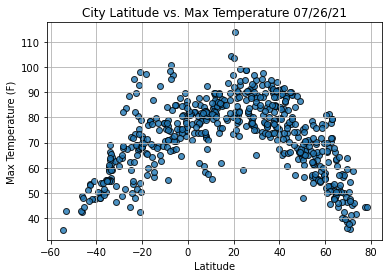

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

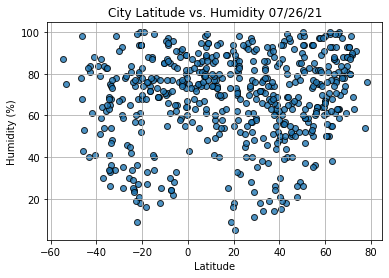

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

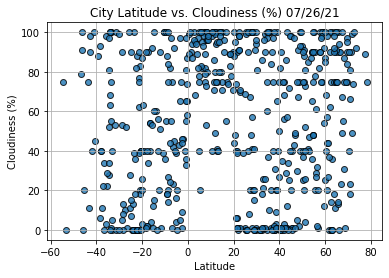

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

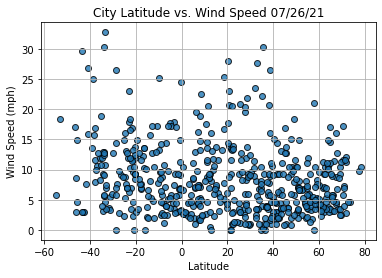

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [81]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]

In [41]:
index13

City                      Lebanon
Country                        US
Date          2021-07-26 17:42:11
Lat                       36.2081
Lng                      -86.2911
Max Temp                    91.62
Humidity                       74
Cloudiness                     20
Wind Speed                   9.22
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
558    False
559     True
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-07-26 17:45:13,71.9167,114.0833,45.10,89,49,2.73
1,Tura,IN,2021-07-26 17:41:06,25.5198,90.2201,76.78,93,100,2.91
2,Manaure,CO,2021-07-26 17:45:13,11.7751,-72.4445,88.84,58,49,8.79
8,Georgetown,MY,2021-07-26 17:45:15,5.4112,100.3354,84.88,85,20,1.99
9,Satuk,TR,2021-07-26 17:45:15,41.2263,32.3836,65.05,87,35,1.88
...,...,...,...,...,...,...,...,...,...
556,Athabasca,CA,2021-07-26 17:45:05,54.7169,-113.2854,72.01,35,48,7.31
559,Camargo,MX,2021-07-26 17:48:23,27.6667,-105.1667,87.58,28,48,1.01
560,Umm Kaddadah,SD,2021-07-26 17:48:24,13.6017,26.6876,89.31,40,80,11.79
561,Chiapilla,MX,2021-07-26 17:48:25,16.5167,-92.7333,85.01,63,55,3.06


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

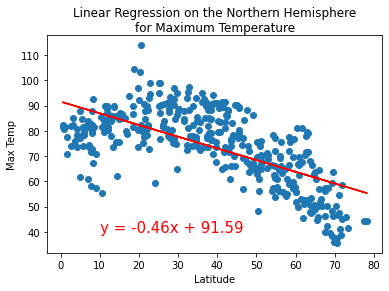

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))
# Missing 'Title' on funcion above
# updated the \n new line character

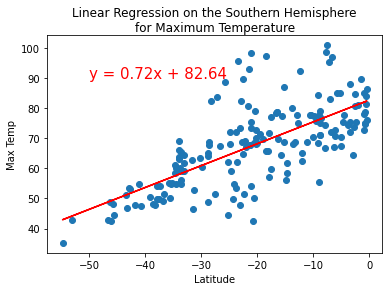

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

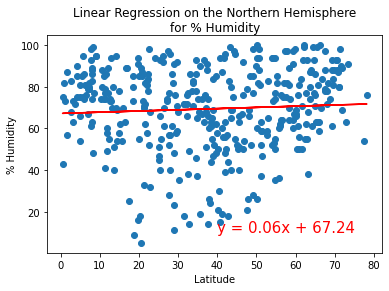

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

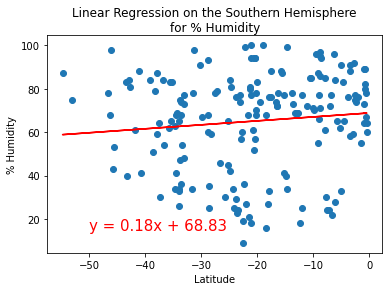

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

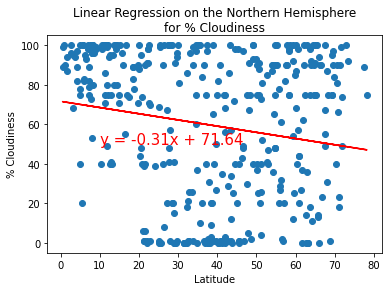

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10,50))

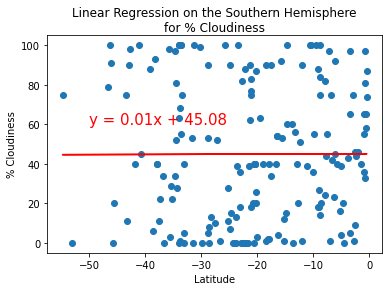

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

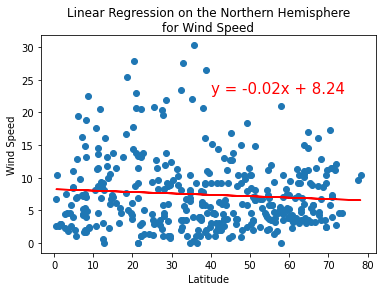

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,23))

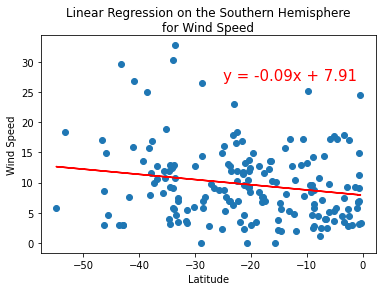

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-25,27))